# Accuracy(정확도)
- 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우 적합한 방법이 아니다. 

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

tdf = pd.read_csv('titanic_train.csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [24]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test , pred, pred_proba=None, roc_score=None):  #y실제값, 예측값 
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1:{3:.4f}, roc_score: {4:.4f}'.format(accuracy , precision ,recall, f1, roc_score))

In [26]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test , pred):  #y실제값, 예측값 
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [9]:
y_tdf = tdf['Survived']
X_tdf = tdf.drop('Survived', axis=1)
X_tdf = transform_features(X_tdf)


X_train, X_test, y_train, y_test = train_test_split(X_tdf, y_tdf, test_size=0.2, random_state=11)
lr_clf = LogisticRegression(solver='liblinear') #solver='liblinear' - 이거 하니까 오류같은게 안뜸 

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, f1:0.7966, roc_score: 0.8987


## [과제 0914_1]
상기 오차 행렬로 수작업으로 정확도, 정밀도, 재현율, F1 score를 구하세요. 


정확도 accuracy_score(실제 결과, 예측 결과)
- 전체 데이터 수 중 예측 결과와 실제 값이 동일한 건수(TN + TP)가 차지하는 비율
`(TN + TP) / (TN + FP + FN + TP)`


<aside>
정밀도(Precision) : precision_score(실제 결과, 예측 결과)

- **예측을 Positive로 한 대상**(FP + TP) 중 **예측과 실제 값이 Positive로 일치한 데이터**(TP)의 비율(Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양측 예측도)
- `TP / (FP + TP)`

    
  

재현율(Recall) : recall_score(실제 결과, 예측 결과)

- **실제가 Positive인 대상**(FN + TP) 중 **예측과 실제 값이 Positive로 일치한 데이터**(TP)의 비율
- `TP / (FN + TP)`
</aside>


In [10]:
cm = confusion_matrix( y_test, pred)
cm

array([[108,  10],
       [ 14,  47]], dtype=int64)

In [11]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
print(TN, FP, FN, TP)

108 10 14 47


In [12]:
#정확도 
accuracy = (TN + TP) / (TN + FP + FN + TP)
print(np.round(accuracy, 4))

0.8659


In [13]:
#정밀도
Precision = TP / (FP + TP)
print(np.round(Precision, 4))

0.8246


In [14]:
#재현율
Recall = TP / (FN + TP)
print(np.round(Recall, 4))

0.7705


In [15]:
#F1 score

## [과제 0914_2]
Precision과 Recall 간의 Trade-off 관계를 시각화하여 설명하세요.
(cf. p.155~166) #정현 a님꺼

In [16]:
y_tdf = tdf['Survived']
X_tdf = tdf.drop('Survived', axis=1)
X_tdf = transform_features(X_tdf)


X_train, X_test, y_train, y_test = train_test_split(X_tdf, y_tdf, test_size=0.2, random_state=11)
lr_clf = LogisticRegression(solver='liblinear') #solver='liblinear' - 이거 하니까 오류같은게 안뜸 

lr_clf.fit(X_train, y_train)
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape), '\n')
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3], '\n')

#예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2) 

pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]] 

두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [17]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
431,3,0,29.699118,1,0,16.1000,7,3
821,3,1,27.000000,0,0,8.6625,7,3
629,3,1,29.699118,0,0,7.7333,7,2
626,2,1,57.000000,0,0,12.3500,7,2
665,2,1,32.000000,2,0,73.5000,7,3
...,...,...,...,...,...,...,...,...
638,3,0,41.000000,0,5,39.6875,7,3
771,3,1,48.000000,0,0,7.8542,7,3
521,3,1,22.000000,0,0,7.8958,7,3
711,1,1,29.699118,0,0,26.5500,2,3


In [18]:
df = X_test.copy()
df.reset_index(drop=True, inplace=True)

In [19]:
pred_proba_df = pd.DataFrame(pred_proba)
df = pd.concat([df, pred_proba_df], axis=1)
# df['pred_proba_result'] = pred
df['pred_proba_result'] = pred

In [20]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,0,1,pred_proba_result
0,3,0,29.699118,1,0,16.1000,7,3,0.449352,0.550648,1
1,3,1,27.000000,0,0,8.6625,7,3,0.863355,0.136645,0
2,3,1,29.699118,0,0,7.7333,7,2,0.864296,0.135704,0
3,2,1,57.000000,0,0,12.3500,7,2,0.849685,0.150315,0
4,2,1,32.000000,2,0,73.5000,7,3,0.823434,0.176566,0


In [21]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

#X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환 
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [27]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.5

#predict_proba()반환 값 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추가해 Binarizer를 적용
#분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이니까 
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [28]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.4

#predict_proba()반환 값 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추가해 Binarizer를 적용
#분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이니까 
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [29]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 차례로 iteration 하면서 평가 수행
    
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [30]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 row가 147건이므로 샘플로 10건만 추출하되, 임계값을 15간격으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index],2))

#15간격 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값 별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값 별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 Shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값 별 정밀도: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값 별 재현율: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


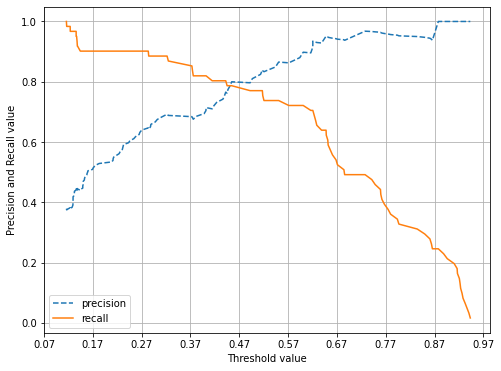

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold 값, y축은 정밀도(점선), 재현율로 plot 
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X 축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #x축과 y축 label과 legend, gird 설정
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [33]:
from sklearn.metrics import roc_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

#반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 간격으로 추출
#thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 간격 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값 별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값 별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값 별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값 별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


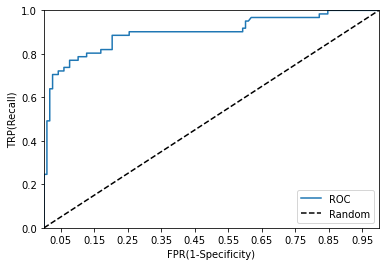

In [34]:
#ROC 곡선 시각화 

def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 FPR, TPR 값을 반환 받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
    #ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림.
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    #FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정등 
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)')
    plt.ylabel('TRP(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [35]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


## [과제 0914_3]
ROC Curve와 AUC를 시각화하여 의미를 설명하고, ROC AUC 값을 구하세요.

# 피마 인디언 당뇨병 예측
* 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.
* 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생

## [과제 0915_1] diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가
- 0 Negative 1 Positive

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

In [ ]:
diabetes_data.info()

In [ ]:
diabetes_data['Outcome'].value_counts()

In [ ]:
diabetes_data['SkinThickness'].value_counts() #값이 너무 많으니 처리해줘야함 

In [ ]:
diabetes_data['Insulin'].value_counts() #애의 0도 처리 